In [108]:
from pathlib import Path
import pandas as pd
import numpy as np
from datetime import datetime
import json

In [109]:
DATA_DIR = (Path.cwd() / ".." / "Data").resolve()

In [110]:
assert (DATA_DIR / "CH 2020-2021.csv").exists()
assert (DATA_DIR / "metervalues_pseudonymized_1_neu.csv").exists()
assert (DATA_DIR / "metervalues_pseudonymized_2_neu.csv").exists()

In [111]:
meter_1 = pd.read_csv(DATA_DIR / "metervalues_pseudonymized_1_neu.csv", delimiter=";")
# Clean extra row of headers
meter_1 = meter_1[meter_1["id"] != "id"]

c:\python38\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [112]:
meter_1["id"] = pd.to_numeric(meter_1["id"])
meter_1["timestamp"] = pd.to_datetime(meter_1["timestamp"])
meter_1["Chargepoint"] = meter_1["Chargepoint"].apply(int)
meter_1["metervalue"] = pd.to_numeric(meter_1["metervalue"])
meter_1["increment"] = pd.to_numeric(meter_1["increment"])

In [113]:
meter_2 = pd.read_csv(DATA_DIR / "metervalues_pseudonymized_2_neu.csv", 
                      delimiter=";", 
                      header=0)

c:\python38\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [114]:
meter_2["id"] = pd.to_numeric(meter_2["id"])
meter_2["timestamp"] = pd.to_datetime(meter_2["timestamp"])
mask = meter_2["Chargepoint"].isnull()
meter_2["Chargepoint"][mask] = 42
meter_2["Chargepoint"] = meter_2["Chargepoint"].apply(int)
meter_2["metervalue"] = pd.to_numeric(meter_2["metervalue"])
meter_2["increment"] = pd.to_numeric(meter_2["increment"])

C:\Users\mbald\AppData\Local\Temp/ipykernel_9060/1139348982.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meter_2["Chargepoint"][mask] = 42


In [115]:
meter = pd.concat([meter_1, meter_2])

In [116]:
meter_1 = meter_2 = None

In [117]:
co2 = pd.read_csv(DATA_DIR / "CH 2020-2021.csv")

In [118]:
UNNECESSARY = [
 'created_at',
 'updated_at',
 'timestamp',
 'zone_name',
 'carbon_intensity_discharge_avg',
 'carbon_origin_percent_nuclear_avg',
 'carbon_origin_percent_geothermal_avg',
 'carbon_origin_percent_biomass_avg',
 'carbon_origin_percent_coal_avg',
 'carbon_origin_percent_wind_avg',
 'carbon_origin_percent_solar_avg',
 'carbon_origin_percent_hydro_avg',
 'carbon_origin_percent_gas_avg',
 'carbon_origin_percent_oil_avg',
 'carbon_origin_percent_unknown_avg',
 'carbon_origin_percent_battery_discharge_avg',
 'carbon_origin_percent_hydro_discharge_avg',
 'power_net_discharge_battery_avg',
 'power_net_discharge_hydro_avg',
 'power_net_import_AT_avg',
 'carbon_intensity_exchange_AT_avg',
 'power_net_import_DE_avg',
 'carbon_intensity_exchange_DE_avg',
 'power_net_import_FR_avg',
 'carbon_intensity_exchange_FR_avg',
 'power_net_import_IT-NO_avg',
 'carbon_intensity_exchange_IT-NO_avg',
 'latest_forecasted_wind_x_avg',
 'latest_forecasted_wind_y_avg',
 'latest_forecasted_solar_avg',
 'latest_forecasted_temperature_avg',
 'latest_forecasted_dewpoint_avg',
 'latest_forecasted_precipitation_avg',
 'latest_forecasted_price_avg',
 'latest_forecasted_production_avg',
 'latest_forecasted_consumption_avg',
 'latest_forecasted_power_net_import_AT_avg',
 'latest_forecasted_power_net_import_DE_avg',
 'latest_forecasted_power_net_import_FR_avg',
 'latest_forecasted_power_net_import_IT-NO_avg',
 'latest_forecasted_production_solar_avg',
 'latest_forecasted_production_wind_avg',
 'power_origin_percent_fossil_avg',
 'power_origin_percent_renewable_avg',
 'power_production_percent_fossil_avg',
 'power_production_percent_renewable_avg',
 'power_production_nuclear_avg',
 'power_production_geothermal_avg',
 'power_production_biomass_avg',
 'power_production_coal_avg',
 'power_production_wind_avg',
 'power_production_solar_avg',
 'power_production_hydro_avg',
 'power_production_gas_avg',
 'power_production_oil_avg',
 'power_production_unknown_avg',
 'carbon_rate_avg',
 'total_storage_avg',
 'total_discharge_avg',
 'total_import_avg',
 'total_export_avg',
 'production_sources'
]

In [119]:
co2.drop(UNNECESSARY, axis=1, inplace=True)

In [120]:
co2["datetime"] = pd.to_datetime(co2["datetime"])

In [121]:
mapping = {
    'carbon_intensity_avg': 'co2_intensity',  # g / kWh
    'carbon_intensity_production_avg': 'co2_production',
    'carbon_intensity_import_avg': 'co2_import',
    'power_consumption_nuclear_avg': 'nuclear',
    'power_consumption_geothermal_avg': 'geothermal',
    'power_consumption_biomass_avg': 'biomass',
    'power_consumption_coal_avg': 'coal',
    'power_consumption_wind_avg': 'wind',
    'power_consumption_solar_avg': 'solar',
    'power_consumption_hydro_avg': 'hydro',
    'power_consumption_gas_avg': 'gas',
    'power_consumption_oil_avg': 'oil',
    'power_consumption_unknown_avg': 'unknown',
    'power_consumption_battery_discharge_avg': 'battery',
    'power_consumption_hydro_discharge_avg': 'hydro',
    'total_consumption_avg': 'consumption',
    'total_production_avg': 'production'
}

co2.rename(mapping, axis=1, inplace=True)

In [122]:
co2.dtypes

datetime          datetime64[ns, UTC]
co2_intensity                 float64
co2_production                float64
co2_import                    float64
production                    float64
consumption                   float64
nuclear                       float64
geothermal                    float64
biomass                       float64
coal                          float64
wind                          float64
solar                         float64
hydro                         float64
gas                           float64
oil                           float64
unknown                       float64
battery                       float64
hydro                         float64
dtype: object

In [123]:
co2

,datetime,co2_intensity,co2_production,co2_import,production,consumption,nuclear,geothermal,biomass,coal,wind,solar,hydro,gas,oil,unknown,battery,hydro
0,2020-01-01 00:00:00+00:00,115.53,42.25,239.46,4679.0,7012.0,3321.21,0.14,235.03,442.94,445.71,0.00,1034.33,293.46,18.54,1038.76,0.0,181.97
1,2020-01-01 01:00:00+00:00,113.57,46.79,255.94,4960.0,7134.0,3224.89,0.14,224.68,432.04,437.79,0.00,1046.74,245.34,17.31,1323.84,0.0,181.31
2,2020-01-01 02:00:00+00:00,113.70,30.13,235.80,4081.0,6973.0,3671.14,3.17,252.13,471.63,472.28,0.01,1107.86,306.60,20.47,586.79,0.0,81.00
3,2020-01-01 03:00:00+00:00,110.52,48.75,231.63,4944.0,7581.0,3638.54,9.61,206.78,376.36,365.74,0.02,1036.09,323.40,17.47,1510.04,0.0,97.00
4,2020-01-01 04:00:00+00:00,111.10,41.83,240.52,4602.0,7180.0,3571.64,5.70,222.40,411.97,397.42,0.02,1041.85,290.49,18.23,1123.35,0.0,97.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,2021-06-30 19:00:00+00:00,74.55,71.97,NaN,9277.0,6200.0,918.46,0.00,0.00,0.00,0.00,0.00,1812.00,0.00,0.00,2405.48,0.0,1064.06
13124,2021-06-30 20:00:00+00:00,78.65,77.04,NaN,9648.0,6535.0,943.88,0.00,0.00,0.00,0.00,0.00,1715.01,0.00,0.00,2823.69,0.0,1052.42
13125,2021-06-30 21:00:00+00:00,103.10,71.17,348.64,7443.0,5730.0,1061.13,0.22,52.81,184.39,128.09,0.00,1456.45,83.60,4.48,2066.78,0.0,692.06
13126,2021-06-30 22:00:00+00:00,120.71,82.12,342.61,6570.0,5640.0,1215.24,0.34,76.70,251.02,193.26,0.01,967.38,95.31,6.64,2635.87,0.0,198.25


In [124]:
co2['datetime'][0].toordinal()

737425

In [125]:
%matplotlib inline

<AxesSubplot:xlabel='datetime'>

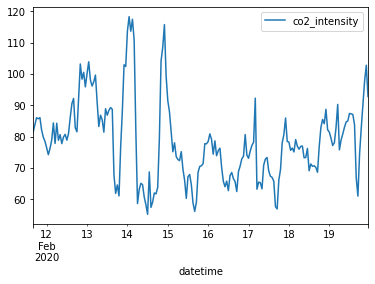

In [126]:
co2[1000:1200].plot(x='datetime', y='co2_intensity')

In [127]:
mondays = co2.loc[co2['datetime'].dt.dayofweek == 0]
tuesdays = co2.loc[co2['datetime'].dt.dayofweek == 1]
wednesdays = co2.loc[co2['datetime'].dt.dayofweek == 2]
thursdays = co2.loc[co2['datetime'].dt.dayofweek == 3]
fridays = co2.loc[co2['datetime'].dt.dayofweek == 4]
saturdays = co2.loc[co2['datetime'].dt.dayofweek == 5]
sundays = co2.loc[co2['datetime'].dt.dayofweek == 6]

In [128]:
mondays

,datetime,co2_intensity,co2_production,co2_import,production,consumption,nuclear,geothermal,biomass,coal,wind,solar,hydro,gas,oil,unknown,battery,hydro
120,2020-01-06 00:00:00+00:00,132.26,38.20,279.38,4621.0,7400.0,3312.29,0.20,300.96,624.96,935.66,0.00,769.40,326.24,23.05,933.97,0.0,173.29
121,2020-01-06 01:00:00+00:00,135.49,35.75,286.66,4530.0,7354.0,3306.18,0.20,308.56,650.73,926.37,0.00,814.46,341.02,23.49,830.77,0.0,152.22
122,2020-01-06 02:00:00+00:00,133.15,34.77,292.83,4470.0,7385.0,3435.56,3.87,295.22,608.41,862.84,0.00,816.81,375.04,22.88,839.37,0.0,125.00
123,2020-01-06 03:00:00+00:00,131.51,34.19,285.37,4432.0,7425.0,3562.56,2.89,286.38,620.96,830.18,0.00,792.64,355.33,22.69,804.27,0.0,147.09
124,2020-01-06 04:00:00+00:00,157.13,25.50,314.19,4180.0,7449.0,3322.79,0.23,349.61,849.79,980.12,0.00,891.71,426.92,26.75,421.43,0.0,179.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13075,2021-06-28 19:00:00+00:00,69.84,68.11,47.69,8259.0,6278.0,1175.00,0.00,3.76,1.61,8.18,0.95,1981.70,12.46,0.63,2246.31,0.0,847.41
13076,2021-06-28 20:00:00+00:00,74.60,72.48,45.55,8799.0,6266.0,968.18,0.00,0.40,0.17,1.24,0.05,1835.44,1.25,0.07,2497.05,0.0,962.15
13077,2021-06-28 21:00:00+00:00,76.77,75.07,49.20,7718.0,6566.0,1165.69,0.00,1.96,1.10,4.59,0.00,1553.22,6.72,0.34,2602.54,0.0,1229.84
13078,2021-06-28 22:00:00+00:00,117.70,71.41,243.17,6305.0,5897.0,1653.00,0.39,93.86,319.25,215.57,0.00,1299.71,150.69,9.17,1955.19,0.0,200.16


In [129]:
# Calculate co2 intensity per hour of average weekday
days = [mondays, tuesdays, wednesdays, thursdays, fridays, saturdays, sundays]
result = {}

j = 0
for day in days:
    hours = []
    
    for i in range(24):
        thishour = day.loc[day['datetime'].dt.hour == i]
        number = len(thishour.index)
        avg = thishour['co2_intensity'].sum() / number
        hours.append(avg)
        
    result[str(j)] = hours
    j += 1

In [130]:
import matplotlib.pyplot as plt

Average Monday


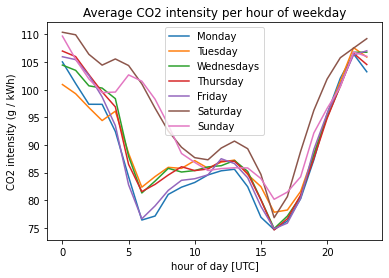

In [132]:
plt.plot(result['0'], label="Monday")
plt.plot(result['1'], label="Tuesday")
plt.plot(result['2'], label="Wednesdays")
plt.plot(result['3'], label="Thursday")
plt.plot(result['4'], label="Friday")
plt.plot(result['5'], label="Saturday")
plt.plot(result['6'], label="Sunday")
plt.title("Average CO2 intensity per hour of weekday")
plt.ylabel("CO2 intensity (g / kWh)")
plt.xlabel("hour of day [UTC]")
plt.legend()

In [133]:
# Calculate average consumption per weekday
days = [mondays, tuesdays, wednesdays, thursdays, fridays, saturdays, sundays]
result = {}

j = 0
for day in days:
    hours = []
    
    for i in range(24):
        thishour = day.loc[day['datetime'].dt.hour == i]
        number = len(thishour.index)
        avg = thishour['consumption'].sum() / number
        hours.append(avg)
        
    result[str(j)] = hours
    j += 1


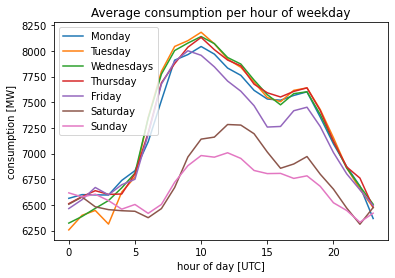

In [134]:
plt.plot(result['0'], label="Monday")
plt.plot(result['1'], label="Tuesday")
plt.plot(result['2'], label="Wednesdays")
plt.plot(result['3'], label="Thursday")
plt.plot(result['4'], label="Friday")
plt.plot(result['5'], label="Saturday")
plt.plot(result['6'], label="Sunday")
plt.title("Average consumption per hour of weekday")
plt.ylabel("consumption [MW]")
plt.xlabel("hour of day [UTC]")
plt.legend()

In [136]:
# Calculate average production per weekday
days = [mondays, tuesdays, wednesdays, thursdays, fridays, saturdays, sundays]
result = {}

j = 0
for day in days:
    hours = []
    
    for i in range(24):
        thishour = day.loc[day['datetime'].dt.hour == i]
        number = len(thishour.index)
        avg = thishour['production'].sum() / number
        hours.append(avg)
        
    result[str(j)] = hours
    j += 1

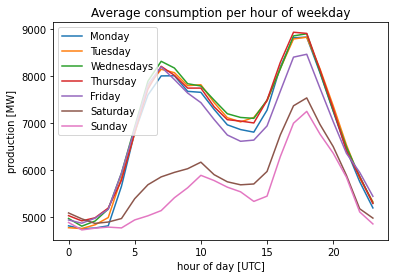

In [137]:
plt.plot(result['0'], label="Monday")
plt.plot(result['1'], label="Tuesday")
plt.plot(result['2'], label="Wednesdays")
plt.plot(result['3'], label="Thursday")
plt.plot(result['4'], label="Friday")
plt.plot(result['5'], label="Saturday")
plt.plot(result['6'], label="Sunday")
plt.title("Average consumption per hour of weekday")
plt.ylabel("production [MW]")
plt.xlabel("hour of day [UTC]")
plt.legend()